In [13]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [16]:
img_array = cv2.imread("/Users/priyabrataghosh/Downloads/dataset/face_mask/00000_Mask.jpg")

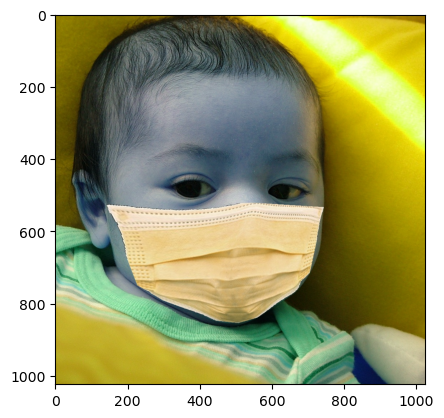

In [17]:
plt.imshow(img_array)

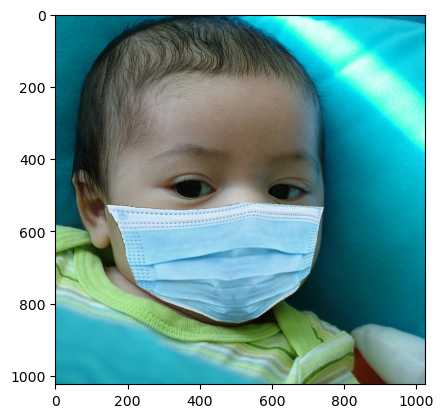

In [18]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

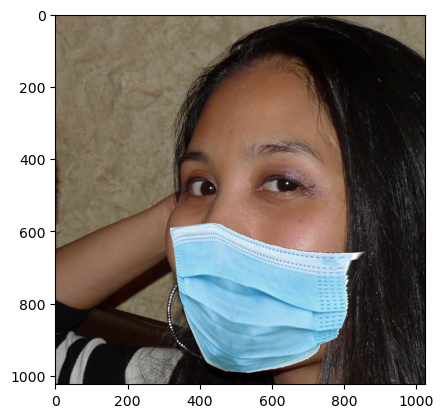

In [22]:
Datadirectory = "/Users/priyabrataghosh/Downloads/dataset/"
Classes = ["face_mask", "no_mask"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
    

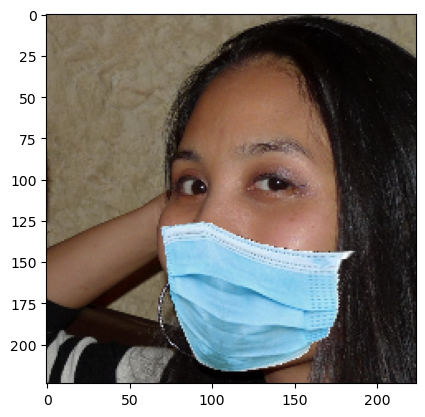

In [23]:
img_size= 224 ## ImageNet => 224 x 224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
## reading the images and converting all to array
training_Data = [] ##data

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
            

In [25]:
create_training_Data()

In [26]:
print(len(training_Data))

1950


In [27]:
import random

random.shuffle(training_Data)

In [62]:
x = []
y = []

for features,label in training_Data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size, 3)

In [60]:
x.shape

(1950, 224, 224, 3)

In [63]:
# normalize the data
X= x/255.0;


In [32]:
Y= np.array(y)

In [33]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [34]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [36]:
#deep learning model for training
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
model = tf.keras.applications.mobilenet.MobileNet()

In [39]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

#transfer learning


Transfer Learning - Tuning, weights will start from last check point

In [40]:
base_input = model.layers[0].input

In [41]:
base_output = model.layers[-4].output

In [42]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## 0, 1
final_output = layers.Activation('sigmoid')(final_output)

In [43]:
new_model = keras.Model(inputs = base_input, outputs = final_output) #creates new model

In [44]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [45]:
new_model.compile(loss="binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])


In [64]:
new_model.fit(X,Y, epochs = 1,validation_split = 0.1)

55/55 [==============================] - 66s 1s/step - loss: 0.0038 - accuracy: 0.9983 - val_loss: 4.6292e-05 - val_accuracy: 1.0000


In [105]:
new_model.save('my_model3.h5')

In [69]:
new_model = tf.keras.models.load_model('my_model3.h5')

In [71]:
frame = cv2.imread('/Users/priyabrataghosh/Downloads/dataset/face_mask/00003_Mask.jpg')

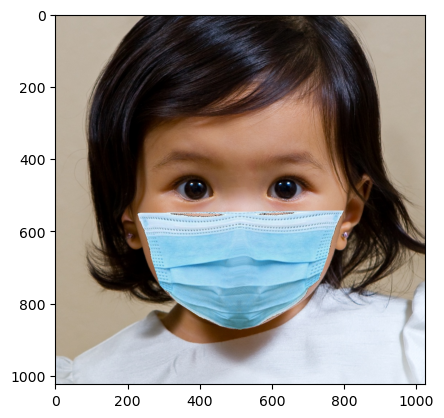

In [72]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [73]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis = 0)#need fourth dimension
final_image = final_image/255.0

In [74]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 690ms/step


In [75]:
Predictions

array([[3.5284262e-13]], dtype=float32)

In [80]:
frame = cv2.imread('/Users/priyabrataghosh/Downloads/asian-woman-sad-serious-fangry-footage-027523388_iconl.jpeg')

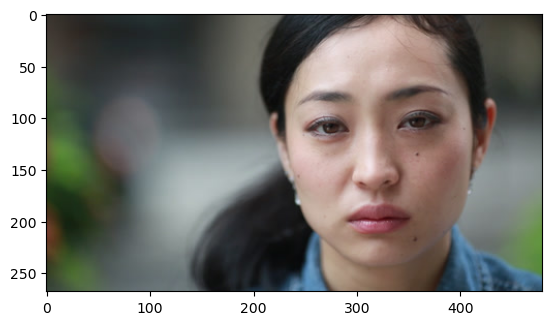

In [81]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [106]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [107]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [108]:
gray.shape

(268, 480)

In [110]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0 ,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

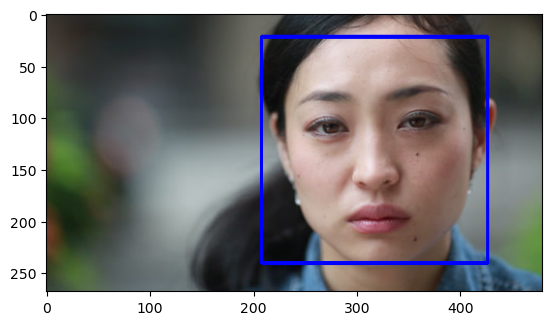

In [111]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

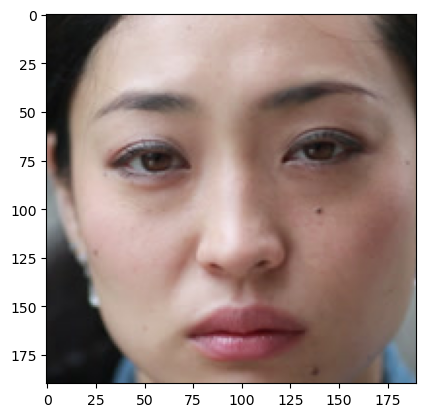

In [112]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [113]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis = 0)#need fourth dimension
final_image = final_image/255.0

In [114]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 84ms/step


In [115]:
Predictions

array([[1.]], dtype=float32)

In [118]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))
text = "Some text in a box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale,  thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
            
    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image,axis = 0)#need fourth dimension
    final_image = final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(Predictions > 0):
        status = "No Mask"
        
        x1,y1,w1,h1 = 0, 0 ,175,75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100, 150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    else:
        status = "Face Mask"
        
        x1,y1,w1,h1 = 0, 0 ,175,75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        cv2.putText(frame,status,(100, 150),font,3,(0,255,0),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
        
    cv2.imshow('Face Mask Detection',frame)
        
    if cv2.waitkey(2) & 0xFF == ord('q'):
        break
            
cap.release()
cv2.destroyAllWindows()
    

OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!


1/1 [==============================] - 0s 25ms/step


AttributeError: module 'cv2' has no attribute 'waitkey'